<a href="https://colab.research.google.com/github/Real1CM/ComputerVison/blob/main/2024.9.27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 图像的灰度直方图
###### 8号 梁宸铭 202408120081142

######1. 读入彩色图像，对于三个通道BGR在一个图中，分别绘制出它的直方图，结合图像的色彩分布，讨论直方图形态和色彩之间有什么关系？

直方图表示了图像各个通道颜色的分布强度及对比度。直方图靠近0，那么对应色彩就暗，靠近255就亮。如果直方图很宽，那么就包含了众多色彩，如果很尖，则色彩比较统一。

######2.　自己编写函数Histogram_Computation(Image)，该函数输入为一张一个通道的图片，函数返回一个1D的array，长度为255，array中的变量类型为int32。返回的array为输入图像的灰度直方图，验证结果正确性。

In [2]:
import numpy as np

def Histogram_Computation(Image):
    histogram = np.zeros(256, dtype=np.int32)

    for pixel_value in Image.flatten():
        histogram[pixel_value] += 1

    return histogram[:255]

In [3]:
from PIL import Image

img_path = './cat.jpg'
img = Image.open(img_path).convert('L')

img_array = np.array(img)

histogram = Histogram_Computation(img_array)
print(histogram)

[118378 407799 250657 708639 295501 291336  49485 250832 156054  73957
  73037  50221  34700  30219  31091  28093  33869  35484  33610  28912
  25983  24144  23180  22503  22086  22636  21961  22372  21637  21440
  21782  21781  21299  20767  21042  19875  19089  18704  18594  18333
  17984  17824  17136  16881  16413  15911  15582  14965  14771  14474
  13932  13689  13340  12933  12557  12159  12228  11504  11598  11480
  11149  11065  10958  10710  10391  10150  10005  10190  10318  10160
  10189  10122   9671   9573   9488   8620   8197   8250   7999   7780
   7455   7295   7221   7122   7025   6700   6406   6339   6288   6127
   6136   6054   6049   5945   5922   5700   5616   5386   5327   5345
   5483   5278   5094   5389   5277   5329   5333   5297   5539   5522
   5742   5863   6020   6158   6316   6475   6592   7193   7149   7606
   7822   8231   8592   9265   9494   9747  10084  10767  11164  11351
  11576  11979  12667  13281  13527  14904  16050  16502  17587  16766
  1636

######3. 统计使用plt.histo函数和自己使用函数计算直方图效率

In [4]:
import time
start_time = time.time()
histogram = Histogram_Computation(img_array)
end_time = time.time()
execution_time = end_time - start_time
execution_time # my function

13.122667074203491

0.5081698894500732

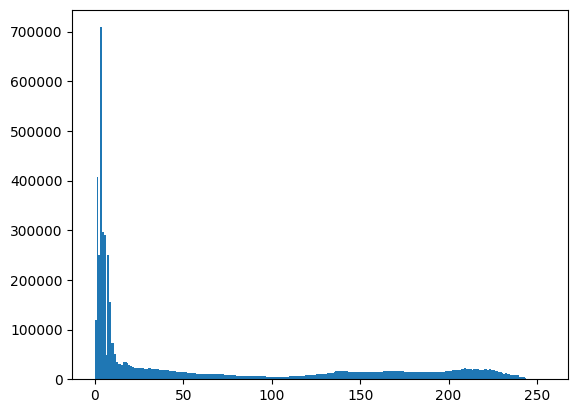

In [6]:
import matplotlib.pyplot as plt

img_path = './cat.jpg'
img = Image.open(img_path).convert('L')
img_array = np.array(img)
start_time = time.time()
plt.hist(img_array.flatten(), bins=255, range=(0, 255))
end_time = time.time()
execution_time = end_time - start_time
execution_time # plt.hist